In [1]:
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv('dataset\\pre-process_datasample_2.csv')
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
Country      11 non-null object
Age          11 non-null float64
Salary       11 non-null float64
Purchased    11 non-null object
dtypes: float64(2), object(2)
memory usage: 512.0+ bytes


In [4]:
data.describe()

,Age,Salary
count,11.000000,11.000000
mean,40.909091,62434.272727
std,11.148583,12459.130019
min,27.000000,45000.000000
25%,34.500000,53000.000000
50%,38.000000,61000.000000
75%,46.000000,69888.500000
max,67.000000,83000.000000


In [5]:
# Delete the record where Label is missing
# 1st - find NA present by .isna
data.Purchased.isna()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
Name: Purchased, dtype: bool

In [6]:
# Delete the record where Label is missing
# 1st - find NA present by .isna
data[data.Purchased.isna()]

,Country,Age,Salary,Purchased
11,Germany,67.0,67777.0,NaN


In [7]:
# Delete the record where Label is missing
# 2nd - Find the index
data.index[data.Purchased.isna()]

Int64Index([11], dtype='int64')

In [8]:
# Delete the record where Label is missing
# Find the index
# Drop that index
data.drop(data.index[data.Purchased.isna()],inplace=True)

In [9]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [10]:
data.Age.mean()

38.3

In [11]:
data.Country.mode()[0] #Ensuring the source & destination datatype should be the same if you remove [0] it will be a series format

'France'

In [12]:
# fillna means replace NaN with values in below case mean
data.Age.fillna(data.Age.mean(),inplace= True)
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.3,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [13]:
data.Salary.fillna(data.Salary.mean(),inplace=True)
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61900.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.3,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [14]:
data.Country.fillna(data.Country.mode()[0],inplace=True)   # [0] is mandatory in case of using mode
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61900.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.3,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [15]:
# We have seen creating Dummy variables for Categorical data in SkLearn (Label & One-Hot Encoding)
# Now we will see creating Dummy varaibles using Pandas for Categorical data

In [16]:
pd.get_dummies(data.Country)

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [17]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61900.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.3,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [18]:
data2 = data.iloc[:,1:]
data2

,Age,Salary,Purchased
0,44.0,72000.0,No
1,27.0,48000.0,Yes
2,30.0,54000.0,No
3,38.0,61000.0,No
4,40.0,61900.0,Yes
5,35.0,58000.0,Yes
6,38.3,52000.0,No
7,48.0,79000.0,Yes
8,50.0,83000.0,No
9,37.0,67000.0,Yes


In [19]:
# Concat the pd.get_dummies with above data2

data2 = pd.concat([pd.get_dummies(data.Country), data.iloc[:,1:]], axis = 1)
data2

,France,Germany,Spain,Age,Salary,Purchased
0,1,0,0,44.0,72000.0,No
1,0,0,1,27.0,48000.0,Yes
2,0,1,0,30.0,54000.0,No
3,0,0,1,38.0,61000.0,No
4,0,1,0,40.0,61900.0,Yes
5,1,0,0,35.0,58000.0,Yes
6,0,0,1,38.3,52000.0,No
7,1,0,0,48.0,79000.0,Yes
8,0,1,0,50.0,83000.0,No
9,1,0,0,37.0,67000.0,Yes


In [20]:
# Seperate your data as features and label
#Ensure the data us in numpy array

features = data2.iloc[:, :-1].values
features

array([[1.00e+00, 0.00e+00, 0.00e+00, 4.40e+01, 7.20e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 2.70e+01, 4.80e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.00e+01, 5.40e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.80e+01, 6.10e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.00e+01, 6.19e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.50e+01, 5.80e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.83e+01, 5.20e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 4.80e+01, 7.90e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.00e+01, 8.30e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.70e+01, 6.70e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.40e+01, 4.50e+04]])

In [21]:
# label = data2.iloc[:,-1].values
# or
label= data2.Purchased.values

label

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes'], dtype=object)

In [22]:
# If you are using sklearn for model creation,
# Your label can be numeric or categorical (String also)
# If you are working in Neural Networks (Deep Learning), then handling label is compulsary
# Your label should be numeric.

# Feature Scaling

In [23]:

from sklearn.preprocessing import StandardScaler

In [24]:
scale = StandardScaler()
features = scale.fit_transform(features)
features

array([[ 1.09544512e+00, -6.12372436e-01, -6.12372436e-01,
         8.50479346e-01,  8.58949016e-01],
       [-9.12870929e-01, -6.12372436e-01,  1.63299316e+00,
        -1.68603800e+00, -1.18211795e+00],
       [-9.12870929e-01,  1.63299316e+00, -6.12372436e-01,
        -1.23841729e+00, -6.71851210e-01],
       [-9.12870929e-01, -6.12372436e-01,  1.63299316e+00,
        -4.47620709e-02, -7.65400113e-02],
       [-9.12870929e-01,  1.63299316e+00, -6.12372436e-01,
         2.53651735e-01,  0.00000000e+00],
       [ 1.09544512e+00, -6.12372436e-01, -6.12372436e-01,
        -4.92382779e-01, -3.31673382e-01],
       [-9.12870929e-01, -6.12372436e-01,  1.63299316e+00,
        -1.06017881e-15, -8.41940124e-01],
       [ 1.09544512e+00, -6.12372436e-01, -6.12372436e-01,
         1.44730696e+00,  1.45426021e+00],
       [-9.12870929e-01,  1.63299316e+00, -6.12372436e-01,
         1.74572076e+00,  1.79443804e+00],
       [ 1.09544512e+00, -6.12372436e-01, -6.12372436e-01,
        -1.93968974e-01

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
# Its already scaled in above so can't do it in below

# from sklearn.preprocessing import MinMaxScaler

# scale2= MinMaxScaler(feature_range=(-1,1))
# features = scale2.fit_transform(features)
# features

In [27]:
# Perform the assignment given by Prashant on melb data
# Assignment Time :)
# Use-case (Melbourne House Price Analysis)
# You need to create a model that can predict the price of house based on Car Parking availability, Landsize, BuildingArea, YearBuilt
# 1. Loading the data (pandas)
# 2. Seperate the data with features and label.
# 3. Check for missing data and repair the same
# 4. Check for categorical data and repair the same
# 5. Perform Numerical data Handling (StandardScaling)

In [28]:
melb = pd.read_csv('dataset\\melb_data.csv')
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [29]:
melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [30]:
melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [31]:
dataFinal = melb.loc[:,['Car','Landsize','BuildingArea','YearBuilt','Price']]
dataFinal

,Car,Landsize,BuildingArea,YearBuilt,Price
0,1.0,202.0,NaN,NaN,1480000.0
1,0.0,156.0,79.0,1900.0,1035000.0
2,0.0,134.0,150.0,1900.0,1465000.0
3,1.0,94.0,NaN,NaN,850000.0
4,2.0,120.0,142.0,2014.0,1600000.0
...,...,...,...,...,...
13575,2.0,652.0,NaN,1981.0,1245000.0
13576,2.0,333.0,133.0,1995.0,1031000.0
13577,4.0,436.0,NaN,1997.0,1170000.0
13578,5.0,866.0,157.0,1920.0,2500000.0


In [32]:
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 5 columns):
Car             13518 non-null float64
Landsize        13580 non-null float64
BuildingArea    7130 non-null float64
YearBuilt       8205 non-null float64
Price           13580 non-null float64
dtypes: float64(5)
memory usage: 530.6 KB


In [33]:
# Price is Continous type (Mean) of data wrt time it keeps on incresing but rest will remain same that's why it's Discrete data(Median)
# But 1st find out NAN data present in above datalist because without dropping 1st if you perform mean/midean it don't make any sense if NAN count is big.

dataFinal[dataFinal.columns[dataFinal.isna().any()]]

,Car,BuildingArea,YearBuilt
0,1.0,NaN,NaN
1,0.0,79.0,1900.0
2,0.0,150.0,1900.0
3,1.0,NaN,NaN
4,2.0,142.0,2014.0
...,...,...,...
13575,2.0,NaN,1981.0
13576,2.0,133.0,1995.0
13577,4.0,NaN,1997.0
13578,5.0,157.0,1920.0


In [34]:
dataFinal.dropna(thresh=4, inplace=True, axis=0) # thresh=Number of non-na values in given record
dataFinal

,Car,Landsize,BuildingArea,YearBuilt,Price
1,0.0,156.0,79.0,1900.0,1035000.0
2,0.0,134.0,150.0,1900.0,1465000.0
4,2.0,120.0,142.0,2014.0,1600000.0
6,0.0,245.0,210.0,1910.0,1876000.0
7,2.0,256.0,107.0,1890.0,1636000.0
...,...,...,...,...,...
13575,2.0,652.0,NaN,1981.0,1245000.0
13576,2.0,333.0,133.0,1995.0,1031000.0
13577,4.0,436.0,NaN,1997.0,1170000.0
13578,5.0,866.0,157.0,1920.0,2500000.0


In [35]:
dataFinal.BuildingArea.unique()

array([7.900000e+01, 1.500000e+02, 1.420000e+02, 2.100000e+02,
       1.070000e+02, 7.500000e+01, 1.900000e+02, 9.400000e+01,
       9.700000e+01, 1.100000e+02, 1.050000e+02, 7.300000e+01,
       1.350000e+02,          nan, 2.700000e+01, 6.000000e+01,
       8.500000e+01, 1.740000e+02, 5.000000e+01, 1.280000e+02,
       1.800000e+01, 1.240000e+02, 9.100000e+01, 8.200000e+01,
       8.100000e+01, 2.250000e+02, 1.450000e+02, 8.400000e+01,
       1.340000e+02, 1.160000e+02, 8.600000e+01, 1.270000e+02,
       1.860000e+02, 9.000000e+01, 1.330000e+02, 1.300000e+02,
       1.130000e+02, 1.000000e+02, 3.090000e+02, 1.920000e+02,
       1.260000e+02, 1.010000e+02, 1.020000e+02, 7.600000e+01,
       1.460000e+02, 1.980000e+02, 1.800000e+02, 1.590000e+02,
       1.220000e+02, 1.810000e+02, 9.800000e+01, 8.300000e+01,
       1.470000e+02, 2.540000e+02, 1.230000e+02, 1.310000e+02,
       3.400000e+01, 2.070000e+02, 6.800000e+01, 5.400000e+01,
       2.630000e+02, 2.030000e+02, 1.650000e+02, 1.4000

In [46]:
# Calculate number of null values present
for _ in dataFinal.columns:
    print("The number of null values in:{} == {}".format(_, dataFinal[_].isnull().sum()))

The number of null values in:Car == 28
The number of null values in:Landsize == 0
The number of null values in:BuildingArea == 1344
The number of null values in:YearBuilt == 271
The number of null values in:Price == 0


In [48]:
dataFinal.Car.fillna(dataFinal.Car.median(),inplace=True)   # [0] is mandatory in case of using mode

In [49]:
dataFinal.BuildingArea.fillna(dataFinal.BuildingArea.median(),inplace=True)   # [0] is mandatory in case of using mode

In [50]:
dataFinal.YearBuilt.fillna(dataFinal.YearBuilt.median(),inplace=True)   # [0] is mandatory in case of using mode
dataFinal

,Car,Landsize,BuildingArea,YearBuilt,Price
1,1.0,156.0,79.0,1900.0,1035000.0
2,1.0,134.0,150.0,1900.0,1465000.0
4,2.0,120.0,142.0,2014.0,1600000.0
6,1.0,245.0,210.0,1910.0,1876000.0
7,2.0,256.0,107.0,1890.0,1636000.0
...,...,...,...,...,...
13575,2.0,652.0,126.0,1981.0,1245000.0
13576,2.0,333.0,133.0,1995.0,1031000.0
13577,4.0,436.0,126.0,1997.0,1170000.0
13578,5.0,866.0,157.0,1920.0,2500000.0


In [51]:
# Calculate number of null values present
for _ in dataFinal.columns:
    print("The number of null values in:{} == {}".format(_, dataFinal[_].isnull().sum()))

The number of null values in:Car == 0
The number of null values in:Landsize == 0
The number of null values in:BuildingArea == 0
The number of null values in:YearBuilt == 0
The number of null values in:Price == 0


In [52]:
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8473 entries, 1 to 13579
Data columns (total 5 columns):
Car             8473 non-null float64
Landsize        8473 non-null float64
BuildingArea    8473 non-null float64
YearBuilt       8473 non-null float64
Price           8473 non-null float64
dtypes: float64(5)
memory usage: 717.2 KB


In [53]:
dataFinal.describe() # In below table you will find 0 min... which is not possible to have some cost. So this need to replace.

,Car,Landsize,BuildingArea,YearBuilt,Price
count,8473.000000,8473.000000,8473.000000,8473.000000,8.473000e+03
mean,1.663165,496.168063,147.857234,1964.869468,1.066993e+06
std,0.851918,1090.821338,496.374104,36.675448,6.679403e+05
min,1.000000,0.000000,0.000000,1196.000000,8.500000e+04
25%,1.000000,158.000000,100.000000,1945.000000,6.225000e+05
50%,2.000000,384.000000,126.000000,1970.000000,8.811000e+05
75%,2.000000,639.000000,161.000000,1998.000000,1.320000e+06
max,10.000000,44500.000000,44515.000000,2018.000000,9.000000e+06


In [39]:
# dataFinal.Car.replace(0,1)

dataFinal["Car"].replace({0:1}, inplace=True)

In [40]:
dataFinal.describe()

,Car,Landsize,BuildingArea,YearBuilt,Price
count,8445.000000,8473.000000,7129.000000,8202.000000,8.473000e+03
mean,1.662049,496.168063,151.977885,1964.699951,1.066993e+06
std,0.853108,1090.821338,541.051796,37.264434,6.679403e+05
min,1.000000,0.000000,0.000000,1196.000000,8.500000e+04
25%,1.000000,158.000000,93.000000,1940.000000,6.225000e+05
50%,2.000000,384.000000,126.000000,1970.000000,8.811000e+05
75%,2.000000,639.000000,174.000000,1999.000000,1.320000e+06
max,10.000000,44500.000000,44515.000000,2018.000000,9.000000e+06


In [41]:
dataFinal[dataFinal.Car==0]   # so there is no value in Car column value present as 0

,Car,Landsize,BuildingArea,YearBuilt,Price


In [55]:
dataFinal

,Car,Landsize,BuildingArea,YearBuilt,Price
1,1.0,156.0,79.0,1900.0,1035000.0
2,1.0,134.0,150.0,1900.0,1465000.0
4,2.0,120.0,142.0,2014.0,1600000.0
6,1.0,245.0,210.0,1910.0,1876000.0
7,2.0,256.0,107.0,1890.0,1636000.0
...,...,...,...,...,...
13575,2.0,652.0,126.0,1981.0,1245000.0
13576,2.0,333.0,133.0,1995.0,1031000.0
13577,4.0,436.0,126.0,1997.0,1170000.0
13578,5.0,866.0,157.0,1920.0,2500000.0


In [60]:
features = dataFinal.iloc[:,[0,1,2,3]].values
features

array([[1.000e+00, 1.560e+02, 7.900e+01, 1.900e+03],
       [1.000e+00, 1.340e+02, 1.500e+02, 1.900e+03],
       [2.000e+00, 1.200e+02, 1.420e+02, 2.014e+03],
       ...,
       [4.000e+00, 4.360e+02, 1.260e+02, 1.997e+03],
       [5.000e+00, 8.660e+02, 1.570e+02, 1.920e+03],
       [1.000e+00, 3.620e+02, 1.120e+02, 1.920e+03]])

In [61]:
label = dataFinal.iloc[:,3].values
label

array([1900., 1900., 2014., ..., 1997., 1920., 1920.])

# Perform Standerd Min Max Scaling on Features

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
features = scaler.fit_transform(features)
features

array([[0.        , 0.00350562, 0.00177468, 0.85644769],
       [0.        , 0.00301124, 0.00336965, 0.85644769],
       [0.11111111, 0.00269663, 0.00318994, 0.99513382],
       ...,
       [0.33333333, 0.00979775, 0.00283051, 0.97445255],
       [0.44444444, 0.01946067, 0.0035269 , 0.88077859],
       [0.        , 0.00813483, 0.00251601, 0.88077859]])

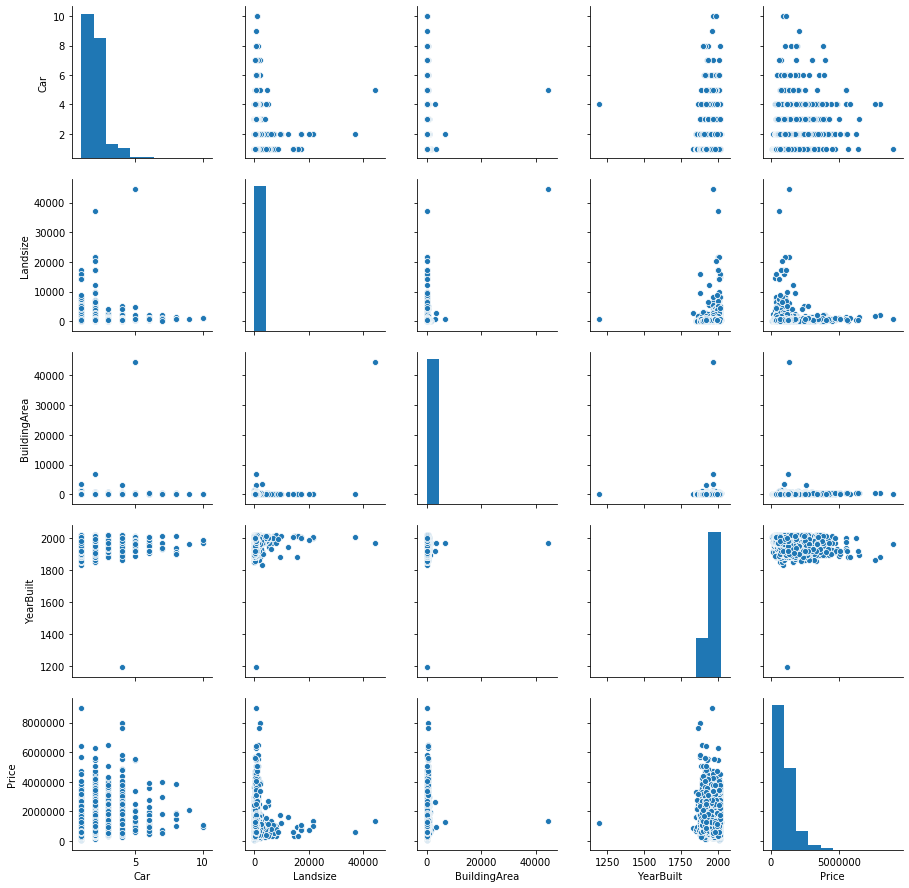

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(dataFinal)

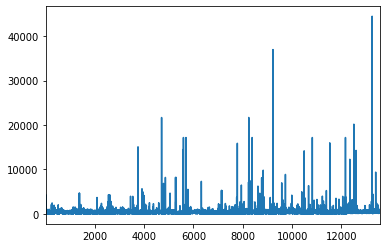

In [43]:
dataFinal.Landsize.plot()

In [44]:
start = pd.read_csv('melb_data.csv', na_values=0) ## On above observation started using data 1st replacing NaN in place of 0
start

FileNotFoundError: [Errno 2] File b'melb_data.csv' does not exist: b'melb_data.csv'

In [ ]:
start.info()

In [ ]:
start.describe()

In [ ]:
startFinal = start.loc[:,['Car','Landsize','BuildingArea','YearBuilt','Price']]
startFinal

In [ ]:
startFinal.info()

In [ ]:
startFinal[startFinal.columns[startFinal.isna().any()]]

In [ ]:
startFinal.dropna(thresh=4, inplace=True, axis=0)
startFinal

In [ ]:
startFinal.info()

In [ ]:
startFinal.describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(startFinal)

In [ ]:
startFinal.Landsize.plot()